## 1. С использованием pandas прочитать данные. У вас есть набор данных в формате CSV, содержащий информацию о продажах железнодорожных билетов за определенный период

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tt_1 = trains_tickets.copy()
tt_1 = pd.read_csv('data/trains_tickets.csv')
tt_1.head(8)

,Date,Departure_Station,Arrival_Station,Class,Fare,Tickets_Sold
0,2022-03-30,Воркута,Сочи,Бизнес,36.22,80
1,2023-09-22,Санкт-Петербург,Нижний Новгород,Первый,99.23,53
2,2022-04-18,Нижний Новгород,Екатеренбург,Второй,87.93,25
3,2022-04-07,Москва,Нижний Новгород,Бизнес,65.36,93
4,2023-01-10,Архангельск,Нижний Новгород,Первый,78.24,87
5,2023-10-29,Нижний Новгород,Ярославль,Первый,75.34,86
6,2022-09-18,Воркута,Ярославль,Бизнес,180.44,26
7,2023-05-14,Ярославль,Москва,Второй,137.87,47


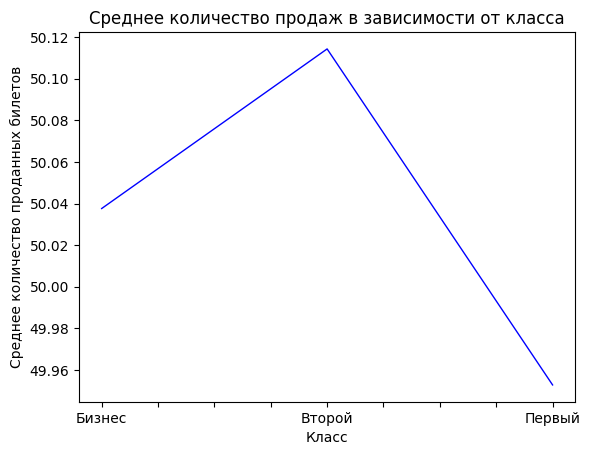

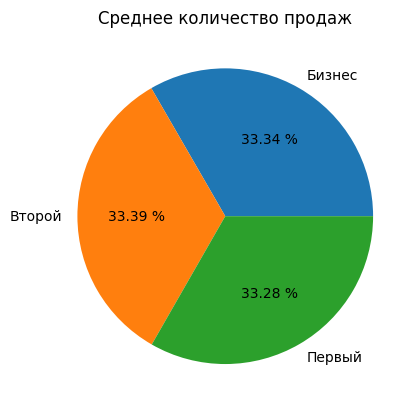

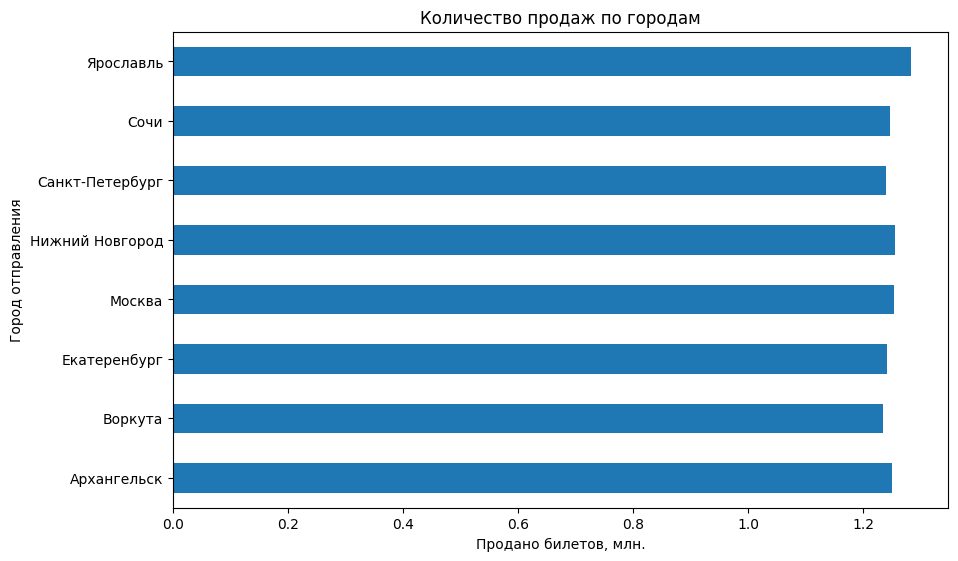

In [78]:
st_Tickets_Sold = tt_1.groupby('Class')['Tickets_Sold'].mean()
st_Tickets_Sold.plot(kind='line', xlabel = 'Класс', ylabel = 'Среднее количество проданных билетов', title = 'Среднее количество продаж в зависимости от класса', color = 'b', linewidth = 1)
plt.show()
print('\n')
print('\n')
st_fare = tt_1.groupby('Class')['Tickets_Sold'].mean()
st_fare.plot(kind = 'pie', title = 'Среднее количество продаж' , autopct='%1.2f %%', ylabel = '', xlabel = '')
plt.show()
print('\n')
print('\n')
st_town_fare = tt_1.groupby('Departure_Station')['Tickets_Sold'].sum()/10**6
st_town_fare.plot(kind = 'barh', xlabel = 'Продано билетов, млн.', ylabel = 'Город отправления', title = 'Количество продаж по городам', figsize=[10,10/1.618])
plt.show()

## 2. Для выполнения этих задач вы будете использовать библиотеку Pandas для предварительной обработки и агрегирования данных, а также Matplotlib для создания визуализаций:

Используйте Pandas для чтения CSV-файла и преобразования данных в удобную для анализа форму.
Примените группировку (groupby) и агрегирующие функции Pandas для расчета сумм, средних значений и других статистик по интересующим категориям.
Используйте Matplotlib для создания графиков, которые помогут визуально проанализировать найденные закономерности и тенденции в данных.

## 3.1 Тренды времени покупки:

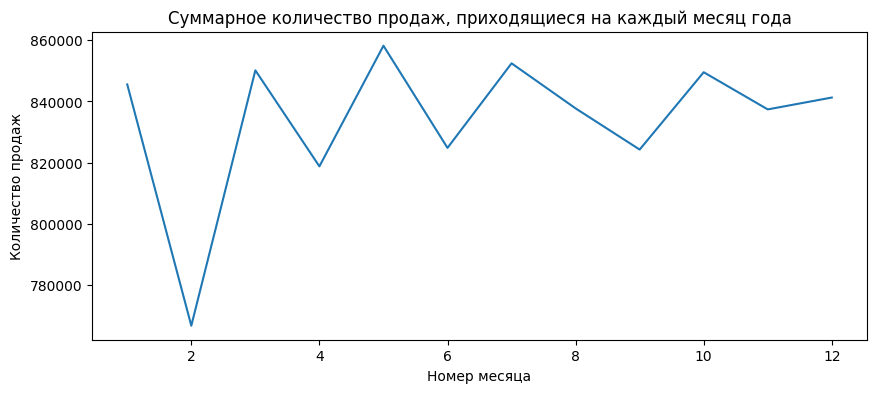

Месяц с максимальным количеством продаж: 5


In [79]:
# Определить, в каком месяце было продано наибольшее количество билетов, используя линейный график продаж по месяцам 
#(в выходной файл добавить номер месяца в виде integer).
tt_2 = trains_tickets.copy()
tt_2['Date'] = pd.to_datetime(tt_2['Date'])
tt_2['Month'] = tt_2['Date'].dt.month
max_tickets_sales = tt_2.groupby('Month')['Tickets_Sold'].sum()
max_tickets_sales.plot(kind='line' ,xlabel = 'Номер месяца', ylabel = 'Количество продаж', title = 'Суммарное количество продаж, приходящиеся на каждый месяц года', figsize=[10,4] , grid = False)
plt.show()
result_3_1 = int(max_tickets_sales.idxmax())
type(result_3_1)
print(f'Месяц с максимальным количеством продаж: {result_3_1}')

In [80]:
# Определить по какому направлению (направление это сочетание двух полей Departure_Station и Arrival_Station) и в каком месяце было продано больше всего билетов 
# (в выходной файл добавить направление в формате: Departure_Station-Arrival_Station).
tt_2['Start-Finish'] = tt_2['Departure_Station'] + '-' + tt_2['Arrival_Station']
track = tt_2.groupby(['Start-Finish', 'Month'])['Tickets_Sold'].sum()
result_3_2 = track.idxmax()[0]
print(f'Направление с максимальным количеством продаж: {result_3_2}')

Направление с максимальным количеством продаж: Ярославль-Архангельск


In [81]:
# Сравнить динамику продаж билетов в рабочие и выходные дни, рассчитав количество проданных билетов в будние дни и выходные дни по всем направлениям 
# (в выходной файл добавить два числа через запятую соответствующие будням и выходным).
tt_2['Week_Days'] = tt_2['Date'].dt.dayofweek
work_days = tt_2[tt_2["Week_Days"].isin([0, 1, 2, 3, 4])]
weekends = tt_2[tt_2["Week_Days"].isin([5, 6])]
result_for_work_days = int(work_days.groupby('Week_Days')['Tickets_Sold'].sum().sum())
result_for_weekend = int(weekends.groupby('Week_Days')['Tickets_Sold'].sum().sum())
print(f'Продаж в будние дни: {result_for_work_days}, Продаж в выходные: {result_for_weekend}')
result_3_3 = f'{result_for_work_days}, {result_for_weekend}'

Продаж в будние дни: 7128019, Продаж в выходные: 2878988


In [82]:
# Рассчитать количество проданных билетов для каждого сезона в году по всем направлениям
# (в выходной файл добавить 4 числа соответствующие: зиме, весне, лету, осени).
winter = tt_2[tt_2["Month"].isin([1, 2, 12])]
spring = tt_2[tt_2["Month"].isin([3, 4, 5])]
summer = tt_2[tt_2["Month"].isin([6, 7, 8])]
autumn = tt_2[tt_2["Month"].isin([9, 10, 11])]
result_for_winter = int(winter.groupby('Month').size().sum())
result_for_spring = int(spring.groupby('Month').size().sum())
result_for_summer = int(summer.groupby('Month').size().sum())
result_for_autumn = int(autumn.groupby('Month').size().sum())
print(f'Продаж зимой: {result_for_winter}, продаж весной: {result_for_spring}, продаж летом: {result_for_summer}, продаж осенью: {result_for_autumn}')
result_3_4 = str(f'{result_for_winter}, {result_for_spring}, {result_for_summer}, {result_for_autumn}')

Продаж зимой: 48981, продаж весной: 50598, продаж летом: 50405, продаж осенью: 50016


5


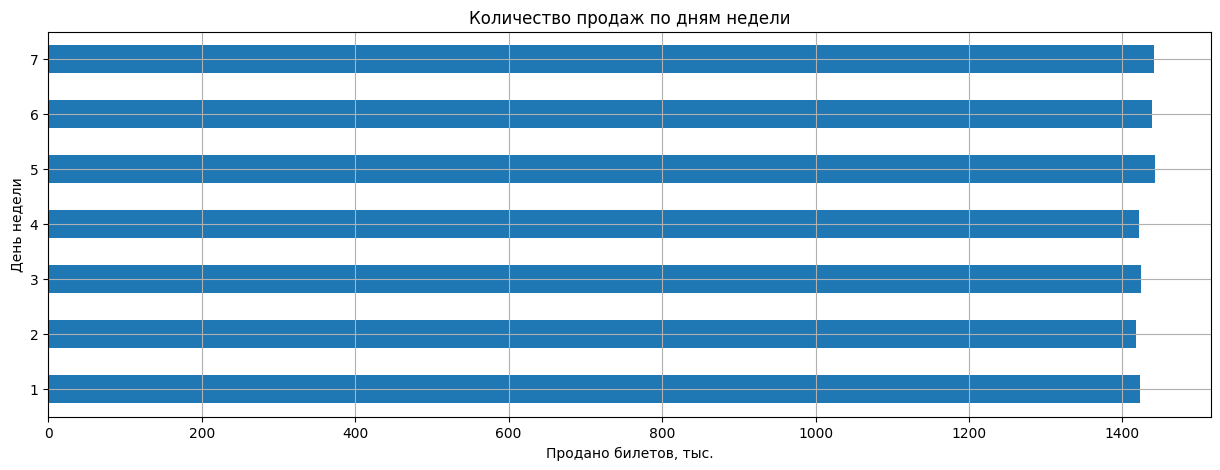

In [83]:
# Анализировать продажи билетов в разрезе дней недели и представить результаты в виде гистограммы для выявления пиковых дней недели по продажам.
# Рассчитать день недели с максимальными продажами (в выходной файл добавить 1 число, соответствующее дню недели. Дни недели считаются с единицы).
tt_2['Week_Days_1'] = tt_2['Week_Days'] + 1
days_7 = tt_2.groupby('Week_Days_1')['Tickets_Sold'].sum()
for_barh = days_7/10**3
print(int(days_7.idxmax()))
for_barh.plot(kind = 'barh', xlabel = 'Продано билетов, тыс.', ylabel = 'День недели', title = 'Количество продаж по дням недели', figsize=[15, 5], grid = True)
plt.show()
result_3_5 = int(days_7.idxmax())

## 3.1 Тренды времени покупки:

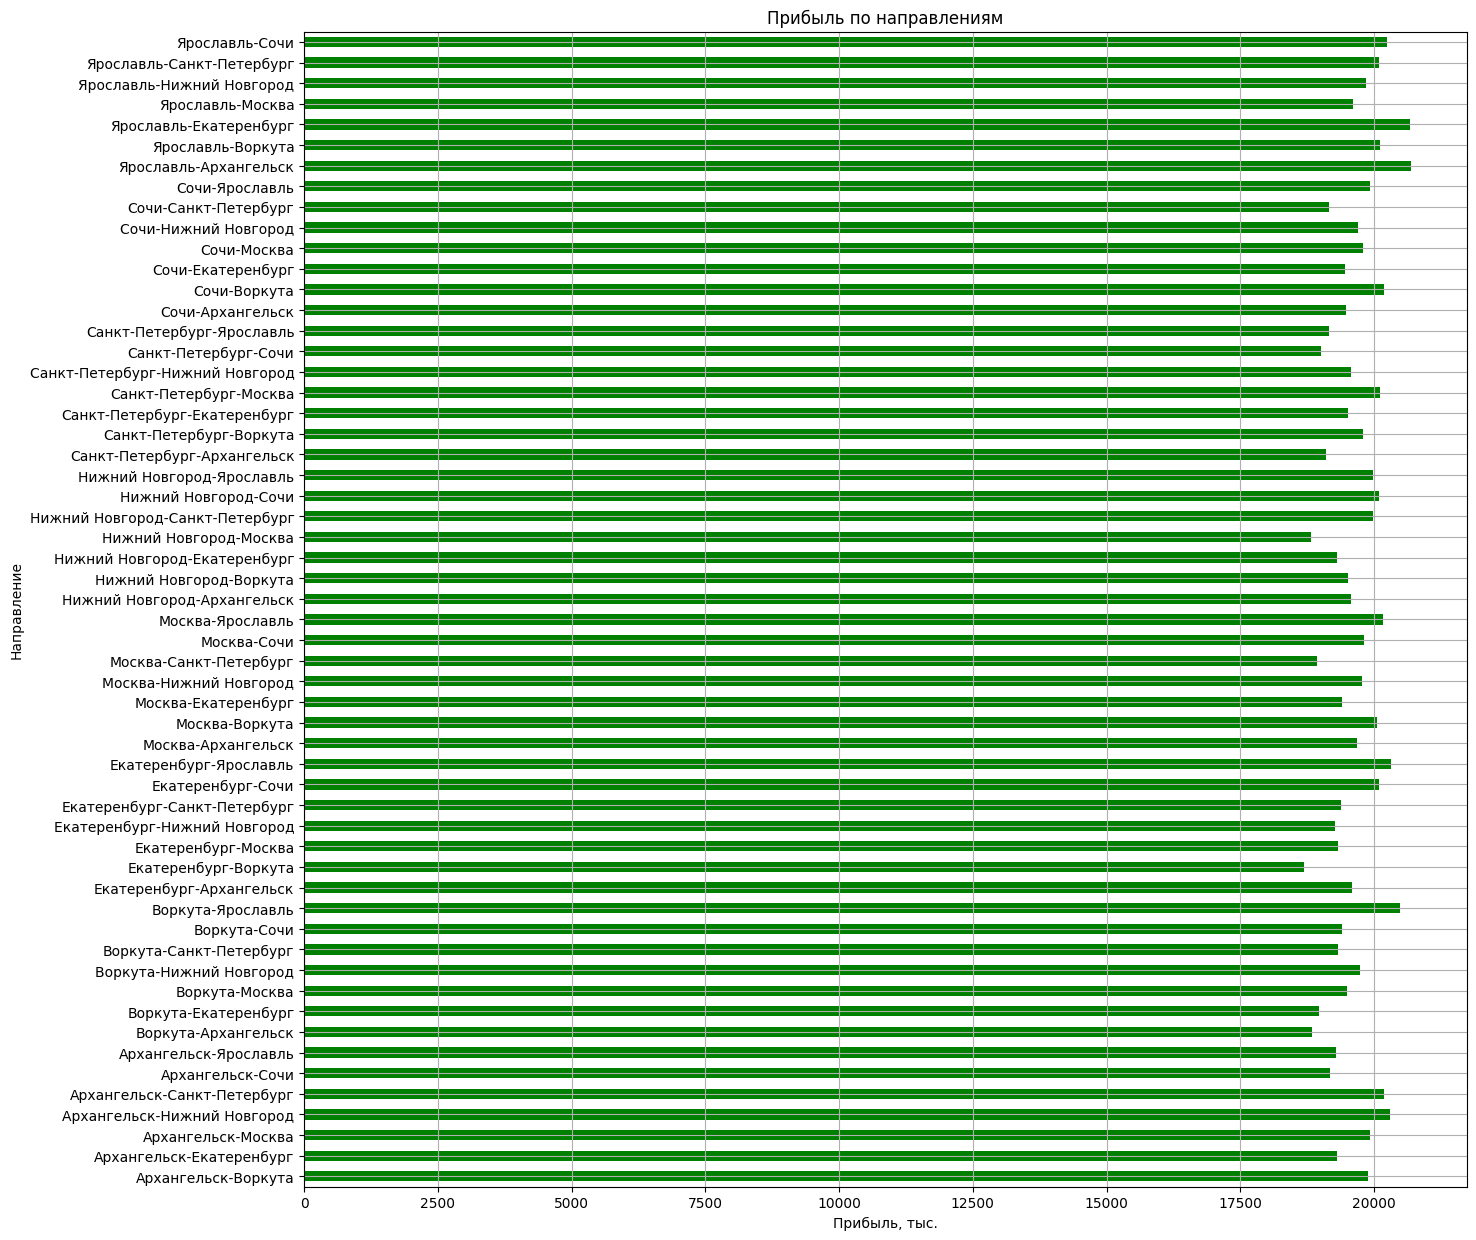

20696


In [84]:
# Сравнить общий доход (количество проданных билетов * стоимость билета) для каждого направления, используя столбчатую диаграмму для визуализации дохода 
# по направлениям. Найти направление с максимальным доходом (в выходной файл добавить доход для направления с максимальным доходом).
tt_2['Profit'] = tt_2['Fare'] * tt_2['Tickets_Sold']
arrival_profit = tt_2.groupby('Start-Finish')['Profit'].sum()/1000
arrival_profit.plot(kind = 'barh', xlabel = 'Прибыль, тыс.', ylabel = 'Направление', title = 'Прибыль по направлениям', figsize=[15, 15], grid = True, color = 'green')
plt.show()
result_3_6 = int(round(arrival_profit.max(), 0))
print(result_3_6)

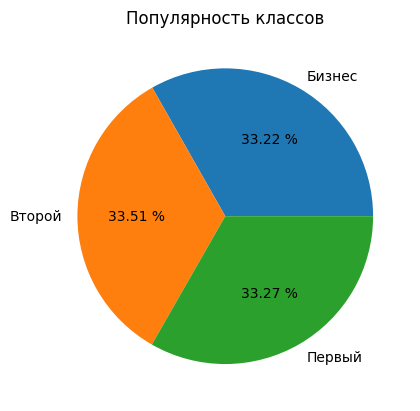

Второй


In [85]:
# Выявить, какой класс обслуживания является наиболее популярным, построив круговую диаграмму, показывающую долю продаж билетов по каждому классу. 
# Рассчитать класс обслуживания с максимальным доходом (в выходной файл добавить класс обслуживания).
sales_by_class = tt_2.groupby('Class')['Tickets_Sold'].sum()
most_popular_class = sales_by_class.idxmax()
sales_by_class.plot(kind = 'pie', title = 'Популярность классов' , autopct='%1.2f %%', ylabel = '', xlabel = '')
plt.show()
result_3_7 = str(most_popular_class)
print(result_3_7)

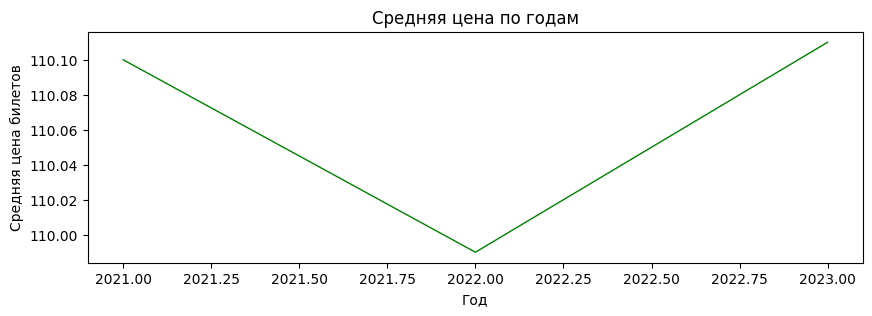

110.1, 109.99, 110.11,


In [87]:
# Оценить, как со временем менялась цена на билеты. Рассчитать среднюю стоимость на билеты в 2021, 2022, 2023 годах 
#(в выходной файл добавить среднюю стоимость для каждого года соответственно: 2021,2022,2023).
tt_2['Year'] = tt_2['Date'].dt.year
fare_of_years = tt_2.groupby('Year')['Fare'].mean().apply(lambda x: float(round(x, 2)))
fare_of_years.plot(kind='line', xlabel = 'Год', ylabel = 'Средняя цена билетов', title = 'Средняя цена по годам', color = 'g', linewidth = 1, figsize = [10, 3])
plt.show()
result_3_8 = str(f'{fare_of_years[2021]}, {fare_of_years[2022]}, {fare_of_years[2023]},')
print(result_3_8)

## 4. Сохранить полученные результаты на шаге 3 результаты в файлы results_1.txt и results_2.txt

In [89]:
with open('results_1.txt', 'w') as file:
    file.write(f'{result_3_1}\n{result_3_2}\n{result_3_3}\n{result_3_4}\n{result_3_5}')
with open('results_2.txt', 'w') as file:
    file.write(f'{result_3_6}\n{result_3_7}\n{result_3_8}')